<a href="https://colab.research.google.com/github/kirangang/ML_Projects/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

**Project Type** - Unsupervised

**Contribution** - Individual

# **Project Summary -**

# **GitHub Link -**

https://github.com/kirangang/ML_Projects

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, we are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [139]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [140]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Importing the dataset to be analysed
data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [142]:
# Shows first 5 rows
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [143]:
# Shows last 5 rows
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [144]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [145]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [146]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [147]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

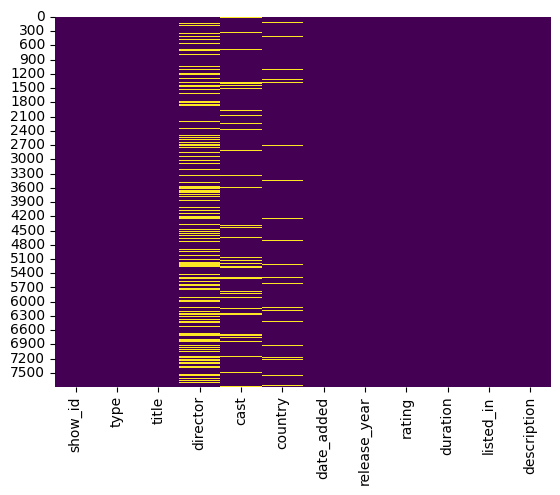

In [148]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

### What did you know about your dataset?

* The above dataset is about Netflix Movies and TV Shows Clustering, where our task is to examine the dataset, build the clustering methods and content based recommendation system.
* The dataset has 7787 rows and 12 columns.
* There are no duplicate rows present in the dataset.
* There are some null values present in the columns director, cast, country, date_added and rating.

## ***2. Understanding Your Variables***

In [149]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [150]:
# Describe numerical variables
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [151]:
# Describe categorical variables
data.describe(include=['object','category'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


### Check Unique Values for each variable.

In [152]:
# Check Unique Values for each variable.
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Variables Description

**1. show_id :** Unique ID for every Movie / TV Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / TV Show

**4. director :** Director of the Movie / Show

**5. cast :** Actors involved in the Movie / Show

**6. country :** Country where the Movie / Show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual release year of the Movie / Show

**9. rating :** TV Rating of the Movie / Show

**10. duration :** Total duration in minutes or number of seasons

**11. listed_in :** Genre

**12. description:** The Summary description

## 3. ***Data Wrangling***

In [153]:
# Creating a copy of our dataset
df = data.copy()

### Handling missing values

In [154]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [155]:
# Handling missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(subset=['date_added','rating'], axis=0, inplace=True)

Since there are lots of missing values present in the 'director', 'cast' and 'country' columns, we will fill those null values with word Unknown.
The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset.

In [156]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we can see that there are no null values present in our dataset.

In [157]:
df.shape

(7770, 12)

## Changing data type of date_added column from string to datetime format

In [158]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'],errors='coerce')  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [159]:
# Typecasting 'date_added' from string to datetime
#df['date_added '] = pd.to_datetime(df['date_added'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1

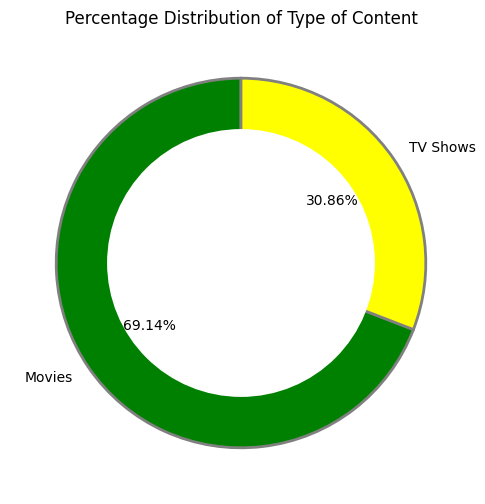

In [160]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
my_colors = ['green', 'yellow']
labels = ['Movies', 'TV Shows']

plt.title('Percentage Distribution of Type of Content')

plt.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', startangle=90, colors=my_colors, wedgeprops={'edgecolor': 'gray', 'linewidth': 2.0})

# Draw a white circle at the center to create the hole
centre_circle = plt.Circle((0, 0), 0.72, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


### Chart - 2

In [161]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd

tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker_color='#ffd700', line=dict(width=4)))
fig.add_trace(go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker_color='#008000', line=dict(width=4)))

fig.update_layout(title="Content added over the years", title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h"))

fig.show()


### Chart - 3

In [162]:
# Chart - 3 visualization code
import plotly.express as px
import calendar

# Count the occurrences of each month
months_df = df['month_added'].value_counts().reset_index()

# Rename the columns
months_df.columns = ['month', 'count']

# Convert numeric month values to month names
months_df['month'] = months_df['month'].astype(int)

# Sort the DataFrame by month index
months_df = months_df.sort_values(by='month')

# Convert month index to month names
months_df['month'] = months_df['month'].apply(lambda x: calendar.month_name[x])

# Create the bar chart with blue color and contrasting shades
fig = px.bar(months_df, x="month", y="count", text="count", color="count",
             color_continuous_scale=['#ADD8E6', '#00008B'], range_color=[months_df['count'].min(), months_df['count'].max()])

# Update layout
fig.update_layout(
    title='Month wise Addition of Movies and TV Shows on Netflix',
    title_x=0.5,
    autosize=False,
    width=1000,
    height=500,
    showlegend=True
)

# Display the chart
fig.show()


### Chart - 4

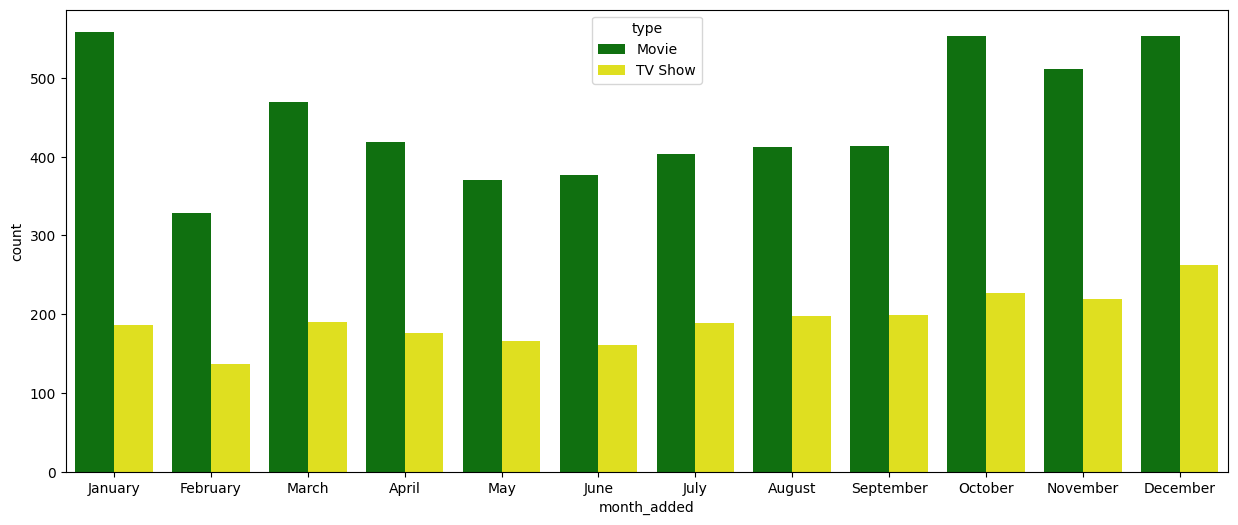

In [163]:
# Chart - 4 visualization code
import calendar

# Count the occurrences of each month
month_counts = df['month_added'].value_counts().reset_index()

# Rename the columns
month_counts.columns = ['month', 'count']

# Sort the DataFrame by month index
month_counts = month_counts.sort_values(by='month')

# Convert month index to month names
month_counts['month'] = month_counts['month'].astype(int)
month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_name[x])

# Create the countplot with specified colors
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='month_added', hue='type', lw=5, data=df, ax=ax, palette={'Movie': 'green', 'TV Show': 'yellow'})

# Set x-axis ticks and labels
ax.set_xticks(range(len(month_counts)))
ax.set_xticklabels(month_counts['month'])

# Show the plot
plt.show()


### Chart - 5

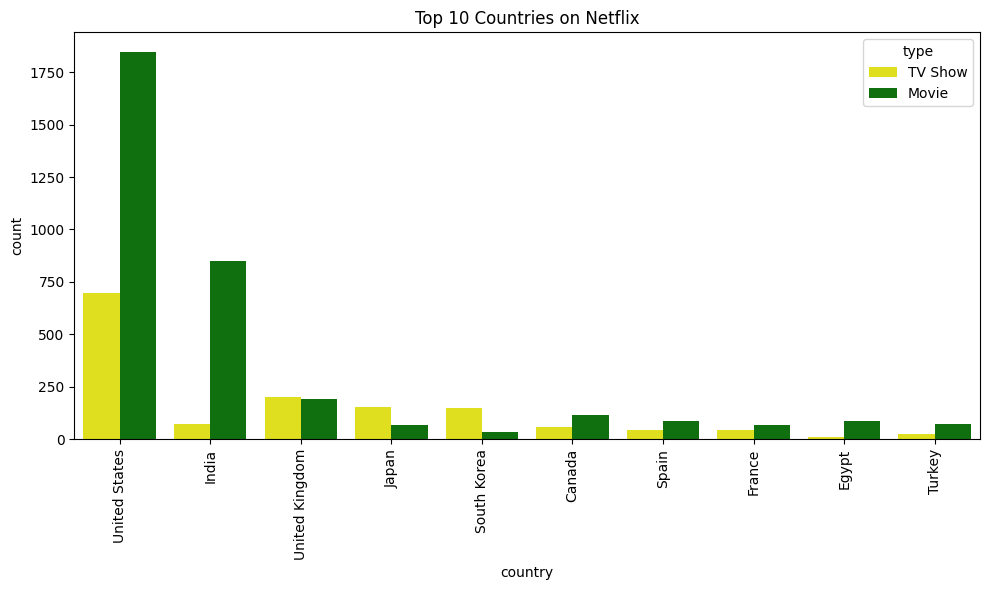

In [164]:
# Chart - 5 visualization code

# Filter out rows with 'Unknown' country
filtered_df = df[df['country'] != 'Unknown']

# Define a color palette dictionary
color_palette = {'Movie': 'green', 'TV Show': 'yellow'}

# Increase figure size
plt.figure(figsize=(10, 6))

# Creating a count plot with specified colors
sns.countplot(
    x="country",                         # x-axis variable (countries)
    data=filtered_df,                    # DataFrame containing the filtered data
    hue='type',                          # Categorical variable to differentiate by color (type)
    order=filtered_df['country'].value_counts().index[0:10],  # Order the countries by count, showing only the top 10
    palette=color_palette                # Assigning specific colors based on the type
)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Top 10 Countries on Netflix')


# Adjusting layout to prevent overlap of labels
plt.tight_layout()

# Displaying the plot
plt.show()


### Chart - 6

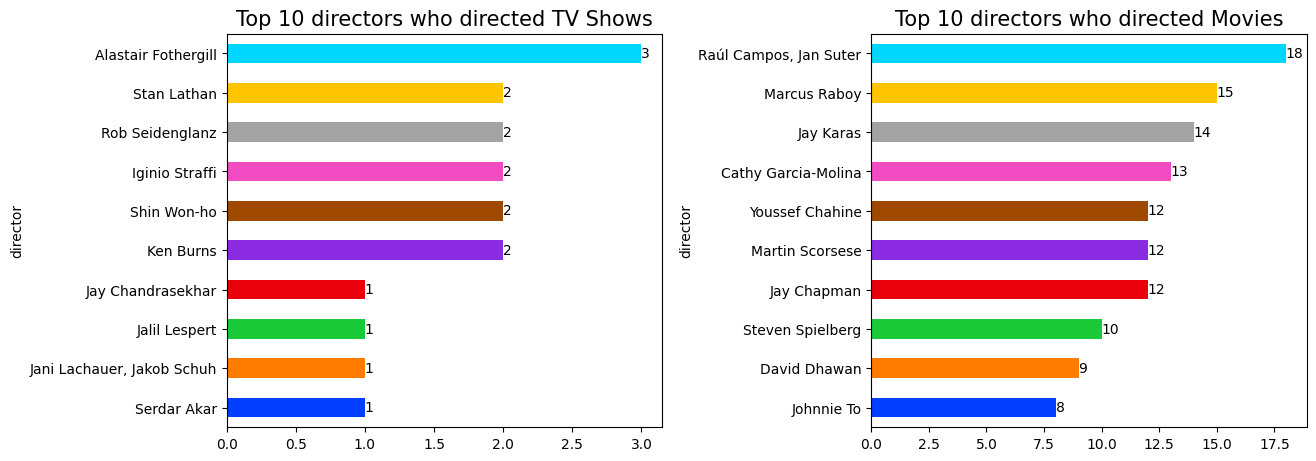

In [165]:
# Chart - 6 visualization code

# Filter out rows with 'Unknown' director for TV shows and movies
filtered_tv_shows = df[(df['type'] == 'TV Show') & (df['director'] != 'Unknown')]
filtered_movies = df[(df['type'] == 'Movie') & (df['director'] != 'Unknown')]

# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot top 10 directors for TV shows with different colors and count on top
tv_shows_directors = filtered_tv_shows['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(tv_shows_directors))
tv_shows = tv_shows_directors.plot(kind='barh', ax=ax[0], color=colors)
tv_shows.set_title('Top 10 directors who directed TV Shows', size=15)
for index, value in enumerate(tv_shows_directors.values):
    tv_shows.text(value, index, str(value), ha='left', va='center')

# Plot top 10 directors for movies with different colors and count on top
movies_directors = filtered_movies['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(movies_directors))
movies = movies_directors.plot(kind='barh', ax=ax[1], color=colors)
movies.set_title('Top 10 directors who directed Movies', size=15)
for index, value in enumerate(movies_directors.values):
    movies.text(value, index, str(value), ha='left', va='center')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()
